In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from numba import jit

# Lyapunov Exponent

In [2]:
@jit
def lyapunov(r, n, x):
    data = np.zeros(n)
    exp = []
    x_copy = x
    for i in r:
        for j in range(n):
                data[j] = x
                x = i * x * (1 - x)
        exp.append((1/n)*(np.sum(np.log(np.abs(i - 2 * i * data)))))
        data = np.zeros(n)
        x = x_copy
    return exp


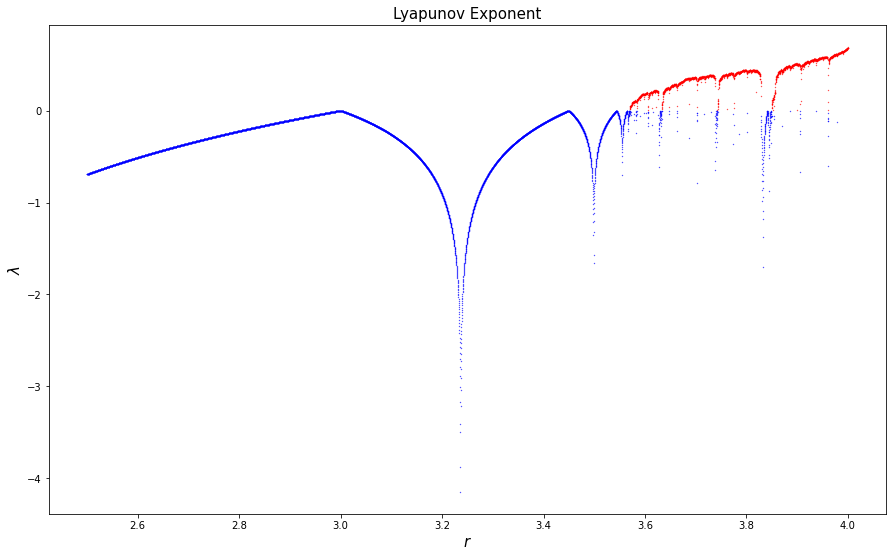

In [3]:
plt.rcParams["figure.figsize"] = [15, 9]
r = np.linspace(2.5, 4, 10000)
exp = lyapunov(r, 10000, 0.3237)
exp = np.array(exp)
mask = exp > 0
exp_pos = ma.masked_array(exp, mask=~mask)
exp_neg = ma.masked_array(exp, mask=mask)
plt.scatter(r, exp_pos, s=0.1, color="r")
plt.scatter(r, exp_neg, s=0.1, color="b")
plt.title("Lyapunov Exponent", fontsize=15)
plt.ylabel(r"$\lambda$", fontsize=15)
plt.xlabel(r"$r$", fontsize=15)
plt.show()


In [4]:
# %timeit lyapunov(r,10000,0.03837)

# Bifurcation diagram of Sine map

In [5]:
@jit
def bif(start, stop, n):
    data = []
    m = 500
    r = np.linspace(start, stop, n)
    y = np.zeros((m - 400))
    y_copy = np.copy(y)
    x = 0.02381
    x_copy = x

    for i in r:
        r_value = i
        for j in range(m):
            x = i * np.sin(np.pi * x)
            if j >= 400:
                y[j - 400] = x
        R = r_value * np.ones((len(y)))
        data.append((R, y))
        y = np.copy(y_copy)
        x = x_copy

    return data


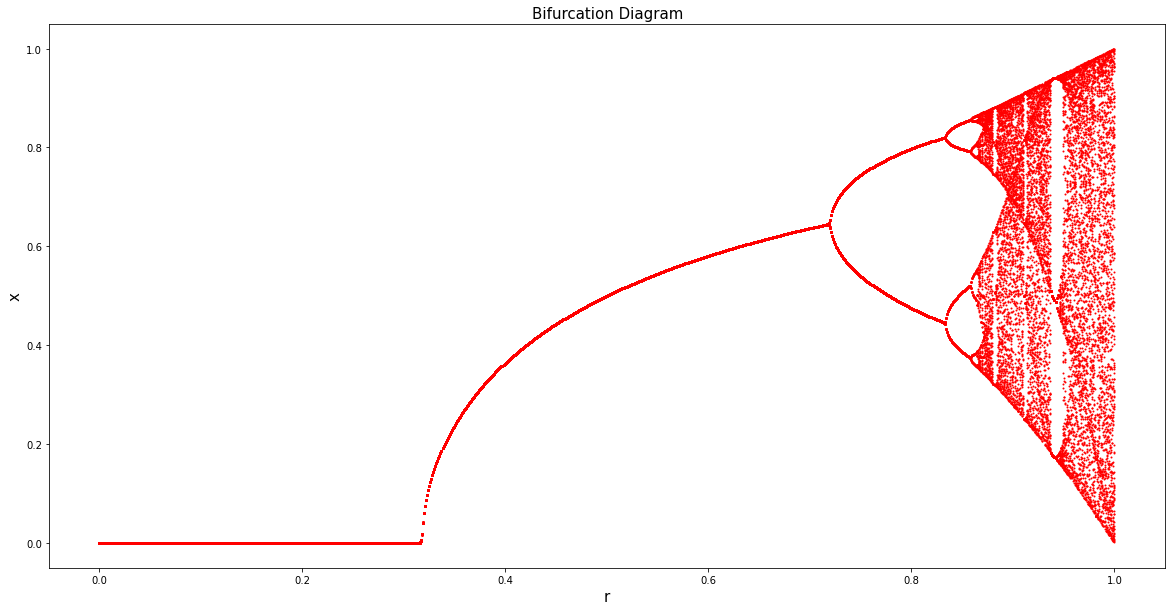

In [7]:
start = 0
stop = 1
res = 1000
data = bif(start, stop, res)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.facecolor"] = "w"
for k in data:
    plt.scatter(k[0], k[1], s=1, color="red")
plt.title("Bifurcation Diagram", fontsize=15)
plt.xlabel("r", fontsize=15)
plt.ylabel("x", fontsize=15)
plt.savefig(f"Bifurfaction diagram {start} to {stop}.png", dpi=300)
plt.show()


# Renormalization 

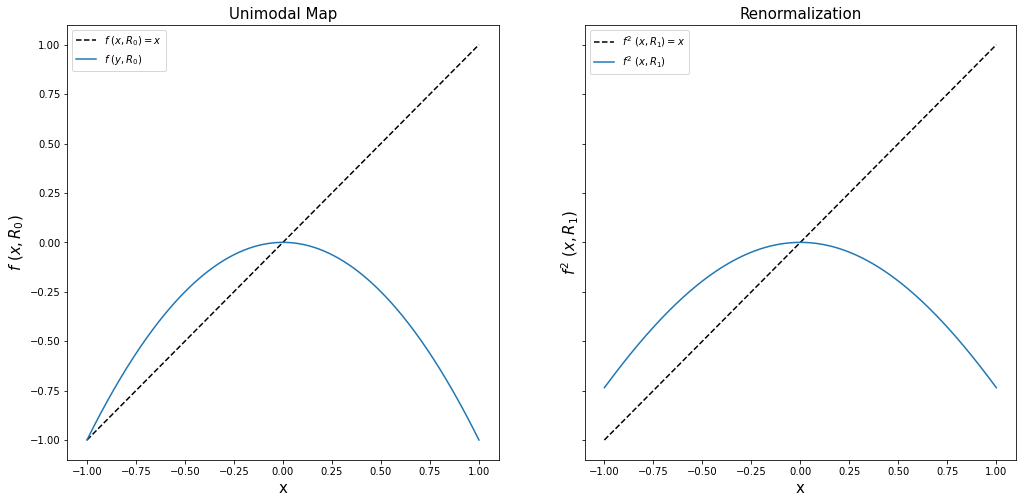

In [32]:
plt.rcParams["figure.figsize"] = [17, 8]
x = np.linspace(-1, 1, 10000)
x_copy = np.copy(x)
y = 0 - x**2
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, x, "--", label=r"$f\ (x,R_{0})=x$", color="black")
ax1.plot(x, y, label=r"$f\ (y,R_{0})$")
ax1.set_title("Unimodal Map", fontsize=15)
ax1.set_xlabel("x", fontsize=15)
ax1.set_ylabel(r"$f\ (x,R_{0})$", fontsize=15)
ax1.legend(loc="best")

n = 2
x = x / -2.5029
for i in range(n):
    x = 1 - x**2
y = -2.5029 * x
ax2.plot(x_copy, x_copy, "--", label=r"$f^{2}\ (x,R_{1})=x$", color="black")
ax2.plot(x_copy, y, label=r"$f^{2}\ (x,R_{1})$")
ax2.set_title("Renormalization", fontsize=15)
ax2.set_xlabel("x", fontsize=15)
ax2.set_ylabel(r"$f^{2}\ (x,R_{1})$", fontsize=15)
ax2.legend(loc="best")
plt.show()
